# Setup

In [1]:
import pandas as pd
import numpy as np
# wizualizacje
import seaborn as sns
import matplotlib.pyplot as plt
# braki w wartościach
import missingno as msno

# ustawienie szerokiego ekranu wyświetlacza JNotebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# opcje wyświetlania w Pandas
# - maks. 55 kolumn
# - maks. 101 wierszy
# - liczby w notacji dziesiętnej z czterema zerami po przecinku
pd.set_option('display.max_columns', 55)
pd.set_option('display.max_rows', 101)
pd.set_option('display.float_format', lambda x: f"{x:.4f}")

# opcje formatowania wykresów matplotlib
# - etykiety osi: bold
# - tekst: bold
# - domyślny rozmiar fontu=14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = '14'

# Wczytanie danych

In [2]:
filepath = r"C:\Users\pnaumczyk\Documents\Dane\Python_modelowanie_crashCourse\train.csv"
df = pd.read_csv(filepath, sep=';')
df

,Kiedy jechał*ś?,Stacja początkowa:,Stacja końcowa:,Liczba minut opóźnienia na starcie:,Liczba minut opóźnienia na mecie:,Rodzaj pociągu:,Jak wrażenia z podróży? :D (nieobowiązkowe),Uwagi (nieobowiązkowe):,Koszt podróży:,Pora dnia:
0,2023-03-07,Gdańsk Oliwa,Legionowo,0,16,"""Zwykły"" InterCity",NaN,NaN,71.0000,popołudnie
1,2023-02-02,Legionowo Przystanek,Warszawa Centralna,0,2,Podmiejski / Regionalne,NaN,NaN,15.0000,rano
2,2024-03-01,Warszawa Centralna,Gdańsk Oliwa,0,2,EIC,NaN,NaN,139.0000,popołudnie
3,2023-09-19,Gdańsk Oliwa,Warszawa Centralna,0,6,Tanie Linie Kolejowe,NaN,NaN,71.0000,rano
4,2023-03-27,Legionowo Przystanek,Warszawa Młynów,2,5,Podmiejski / Regionalne,NaN,NaN,15.0000,NaN
...,...,...,...,...,...,...,...,...,...,...
100,2023-02-15,Warszawa Centralna,Gdańsk Oliwa,0,17,Pendolino,NaN,NaN,169.0000,popołudnie
101,2023-04-10,Gdańsk Oliwa,Legionowo,6,23,"""Zwykły"" InterCity",NaN,NaN,71.0000,popołudnie
102,2024-05-21,Gdańsk Oliwa,Warszawa Centralna,26,38,Pendolino,NaN,NaN,169.0000,rano
103,2023-12-01,Warszawa Centralna,Gdańsk Oliwa,1,136,"""Zwykły"" InterCity",NaN,NaN,71.0000,popołudnie


# Spis treści
1. [Typy danych, zamiana nazw kolumn](#dtypes)
2. [Braki danych](#braki)
3. [Duplikaty](#duplikaty)
4. [Wstępne czyszczenie](#czyszczenie)
5. [Wyliczenie zmiennych wyjaśnianych](#zmienne)
5. [Statystyki opisowe](#opisowe)
6. [Wykresy podstawowe w pandas](#wykresy)

***
***

# <a id='dtypes'>Typy danych, zamiana nazw kolumn </a> 
1. Sprawdź poprawność przypisania typów danych w zbiorze
2. Popraw niewłaściwe przypisanie typów, przypisz minimalne wielkościowo typy, sprawdź poprawność korekty (każdy)
    1. Wczytaj dane od poziomu csv z poprawnym słownikiem typów (opcjonalne)
    2. Wykonaj zadanie 2 z użyciem method chaining (opcjonalne)
3. Zamień nazwy kolumn na nieposiadające polskich znaków (każdy)
    1. Rozszerz method chaining z punktu 2b o zamianę nazw (opcjonalne)

In [3]:
# Zadanie 1 
df.dtypes

Kiedy jechał*ś?                                 object
Stacja początkowa:                              object
Stacja końcowa:                                 object
Liczba minut opóźnienia na starcie:              int64
Liczba minut opóźnienia na mecie:                int64
Rodzaj pociągu:                                 object
Jak wrażenia z podróży? :D (nieobowiązkowe)    float64
Uwagi (nieobowiązkowe):                         object
Koszt podróży:                                 float64
Pora dnia:                                      object
dtype: object

In [4]:
# Zadanie 2
#  data
df['Kiedy jechał*ś?'] = pd.to_datetime(df['Kiedy jechał*ś?'])
#  numeryczne
df['Liczba minut opóźnienia na starcie:'] = pd.to_numeric(df['Liczba minut opóźnienia na starcie:'], downcast='integer')
df['Liczba minut opóźnienia na mecie:'] = pd.to_numeric(df['Liczba minut opóźnienia na mecie:'], downcast='integer')
df['Koszt podróży:'] = pd.to_numeric(df['Koszt podróży:'], downcast='float')
# stringi
df['Stacja początkowa:'] = df['Stacja początkowa:'].astype('string')
df['Stacja końcowa:'] = df['Stacja końcowa:'].astype('string')
df['Jak wrażenia z podróży? :D (nieobowiązkowe)'] = df['Jak wrażenia z podróży? :D (nieobowiązkowe)'].astype('string')
df['Uwagi (nieobowiązkowe):'] = df['Uwagi (nieobowiązkowe):'].astype('string')
# kategorie
df['Rodzaj pociągu:'] = df['Rodzaj pociągu:'].astype('category')
df['Pora dnia:'] = df['Pora dnia:'].astype('category')

df.dtypes

Kiedy jechał*ś?                                datetime64[ns]
Stacja początkowa:                                     string
Stacja końcowa:                                        string
Liczba minut opóźnienia na starcie:                      int8
Liczba minut opóźnienia na mecie:                       int16
Rodzaj pociągu:                                      category
Jak wrażenia z podróży? :D (nieobowiązkowe)            string
Uwagi (nieobowiązkowe):                                string
Koszt podróży:                                        float32
Pora dnia:                                           category
dtype: object

In [5]:
# Zadanie 2A
dtypes_dict = {
    **{
        k: 'int16'
            for k in ['Liczba minut opóźnienia na starcie:', 'Liczba minut opóźnienia na mecie:']
    }, 
    **{
        k: 'float32'
            for k in ['Koszt podróży:']
    },
    **{
        k : 'string'
            for k in ['Stacja początkowa:', 'Stacja końcowa:', 'Jak wrażenia z podróży? :D (nieobowiązkowe)', 'Uwagi (nieobowiązkowe):']
    },
    **{
        k : 'category'
            for k in ['Rodzaj pociągu:', 'Pora dnia:']
    },
    
}
filepath = r"C:\Users\pnaumczyk\Documents\Dane\Python_modelowanie_crashCourse\train.csv"
df = pd.read_csv(filepath, sep=';', dtype=dtypes_dict, parse_dates=[0])
df.dtypes

Kiedy jechał*ś?                                datetime64[ns]
Stacja początkowa:                                     string
Stacja końcowa:                                        string
Liczba minut opóźnienia na starcie:                     int16
Liczba minut opóźnienia na mecie:                       int16
Rodzaj pociągu:                                      category
Jak wrażenia z podróży? :D (nieobowiązkowe)            string
Uwagi (nieobowiązkowe):                                string
Koszt podróży:                                        float32
Pora dnia:                                           category
dtype: object

In [6]:
# Zadanie 2B
filepath = r"C:\Users\pnaumczyk\Documents\Dane\Python_modelowanie_crashCourse\train.csv"
df = (
    pd.read_csv(filepath, sep=';')
    
    .assign(
        **{
             k: lambda df_, col = k: pd.to_datetime(df_[col])
                for k in [
                    'Kiedy jechał*ś?'
                ]
        },
        **{ k: lambda df_, col = k: pd.to_numeric(df_[col], downcast='float')
                for k in [
                    'Koszt podróży:'
                ]
        },
        **{ k: lambda df_, col = k: pd.to_numeric(df_[col], downcast='integer')
                for k in [
                    'Liczba minut opóźnienia na starcie:', 'Liczba minut opóźnienia na mecie:'
                ]
        }
    )
    
    .astype({
        **{ k: 'string' 
               for k in [
                   'Stacja początkowa:', 'Stacja końcowa:', 'Jak wrażenia z podróży? :D (nieobowiązkowe)', 'Uwagi (nieobowiązkowe):'
               ]            
        },
        **{ k: 'category' 
               for k in [
                   'Rodzaj pociągu:', 'Pora dnia:'
               ]            
        }
    })
)
df.dtypes

Kiedy jechał*ś?                                datetime64[ns]
Stacja początkowa:                                     string
Stacja końcowa:                                        string
Liczba minut opóźnienia na starcie:                      int8
Liczba minut opóźnienia na mecie:                       int16
Rodzaj pociągu:                                      category
Jak wrażenia z podróży? :D (nieobowiązkowe)            string
Uwagi (nieobowiązkowe):                                string
Koszt podróży:                                        float32
Pora dnia:                                           category
dtype: object

In [7]:
# Zadanie 3
df = df.rename(columns={
    'Kiedy jechał*ś?'         : 'data_przejazdu',
    'Stacja początkowa:'      : 'stacja_start',
    'Stacja końcowa:'         : 'stacja_finisz',
    'Rodzaj pociągu:'         : 'rodzaj_pociagu',
    'Uwagi (nieobowiązkowe):' : 'uwagi',
    'Koszt podróży:'          : 'cena_biletu',
    'Pora dnia:'              : 'pora_dnia_przejazdu',
    'Liczba minut opóźnienia na starcie:' : 'opoznienie_start',
    'Liczba minut opóźnienia na mecie:'   : 'opoznienie_finisz',
    'Jak wrażenia z podróży? :D (nieobowiązkowe)' : 'wrazenia'
})
df

,data_przejazdu,stacja_start,stacja_finisz,opoznienie_start,opoznienie_finisz,rodzaj_pociagu,wrazenia,uwagi,cena_biletu,pora_dnia_przejazdu
0,2023-03-07,Gdańsk Oliwa,Legionowo,0,16,"""Zwykły"" InterCity",<NA>,<NA>,71.0000,popołudnie
1,2023-02-02,Legionowo Przystanek,Warszawa Centralna,0,2,Podmiejski / Regionalne,<NA>,<NA>,15.0000,rano
2,2024-03-01,Warszawa Centralna,Gdańsk Oliwa,0,2,EIC,<NA>,<NA>,139.0000,popołudnie
3,2023-09-19,Gdańsk Oliwa,Warszawa Centralna,0,6,Tanie Linie Kolejowe,<NA>,<NA>,71.0000,rano
4,2023-03-27,Legionowo Przystanek,Warszawa Młynów,2,5,Podmiejski / Regionalne,<NA>,<NA>,15.0000,NaN
...,...,...,...,...,...,...,...,...,...,...
100,2023-02-15,Warszawa Centralna,Gdańsk Oliwa,0,17,Pendolino,<NA>,<NA>,169.0000,popołudnie
101,2023-04-10,Gdańsk Oliwa,Legionowo,6,23,"""Zwykły"" InterCity",<NA>,<NA>,71.0000,popołudnie
102,2024-05-21,Gdańsk Oliwa,Warszawa Centralna,26,38,Pendolino,<NA>,<NA>,169.0000,rano
103,2023-12-01,Warszawa Centralna,Gdańsk Oliwa,1,136,"""Zwykły"" InterCity",<NA>,<NA>,71.0000,popołudnie


In [8]:
# Zadanie 3A
filepath = r"C:\Users\pnaumczyk\Documents\Dane\Python_modelowanie_crashCourse\train.csv"
df = (
    pd.read_csv(filepath, sep=';')
    
    .assign(
        **{
             k: lambda df_, col = k: pd.to_datetime(df_[col])
                for k in [
                    'Kiedy jechał*ś?'
                ]
        },
        **{ k: lambda df_, col = k: pd.to_numeric(df_[col], downcast='float')
                for k in [
                    'Koszt podróży:'
                ]
        },
        **{ k: lambda df_, col = k: pd.to_numeric(df_[col], downcast='integer')
                for k in [
                    'Liczba minut opóźnienia na starcie:', 'Liczba minut opóźnienia na mecie:'
                ]
        }
    )
    
    .astype({
        **{ k: 'string' 
               for k in [
                   'Stacja początkowa:', 'Stacja końcowa:', 'Jak wrażenia z podróży? :D (nieobowiązkowe)', 'Uwagi (nieobowiązkowe):'
               ]            
        },
        **{ k: 'category' 
               for k in [
                   'Rodzaj pociągu:', 'Pora dnia:'
               ]            
        }
    })
    
    .rename(columns={
        'Kiedy jechał*ś?'         : 'data_przejazdu',
        'Stacja początkowa:'      : 'stacja_start',
        'Stacja końcowa:'         : 'stacja_finisz',
        'Rodzaj pociągu:'         : 'rodzaj_pociagu',
        'Uwagi (nieobowiązkowe):' : 'uwagi',
        'Koszt podróży:'          : 'cena_biletu',
        'Pora dnia:'              : 'pora_dnia_przejazdu',
        'Liczba minut opóźnienia na starcie:' : 'opoznienie_start',
        'Liczba minut opóźnienia na mecie:'   : 'opoznienie_finisz',
        'Jak wrażenia z podróży? :D (nieobowiązkowe)' : 'wrazenia'
    })
)
df

,data_przejazdu,stacja_start,stacja_finisz,opoznienie_start,opoznienie_finisz,rodzaj_pociagu,wrazenia,uwagi,cena_biletu,pora_dnia_przejazdu
0,2023-03-07,Gdańsk Oliwa,Legionowo,0,16,"""Zwykły"" InterCity",<NA>,<NA>,71.0000,popołudnie
1,2023-02-02,Legionowo Przystanek,Warszawa Centralna,0,2,Podmiejski / Regionalne,<NA>,<NA>,15.0000,rano
2,2024-03-01,Warszawa Centralna,Gdańsk Oliwa,0,2,EIC,<NA>,<NA>,139.0000,popołudnie
3,2023-09-19,Gdańsk Oliwa,Warszawa Centralna,0,6,Tanie Linie Kolejowe,<NA>,<NA>,71.0000,rano
4,2023-03-27,Legionowo Przystanek,Warszawa Młynów,2,5,Podmiejski / Regionalne,<NA>,<NA>,15.0000,NaN
...,...,...,...,...,...,...,...,...,...,...
100,2023-02-15,Warszawa Centralna,Gdańsk Oliwa,0,17,Pendolino,<NA>,<NA>,169.0000,popołudnie
101,2023-04-10,Gdańsk Oliwa,Legionowo,6,23,"""Zwykły"" InterCity",<NA>,<NA>,71.0000,popołudnie
102,2024-05-21,Gdańsk Oliwa,Warszawa Centralna,26,38,Pendolino,<NA>,<NA>,169.0000,rano
103,2023-12-01,Warszawa Centralna,Gdańsk Oliwa,1,136,"""Zwykły"" InterCity",<NA>,<NA>,71.0000,popołudnie


# <a id='braki'>Braki danych</a> 
1. Sprawdź liczbę braków danych dla każdej z kolumn
2. Sprawdź czy braki mają charakter row-wise, czy colum-wise z użyciem biblioteki missingno
3. Dla braków column-wise zbadaj jakie wartości są przyjmowane w wypełnionych polach (gdy dużo braków) oraz co charakteryzuje te braki (gdy mało braków)
4. Podejmij decyzję co do sposobu czyszczenia braków
5. Wyświetl wykres słupkowy przedstawiający odsetek braków dla każdej z kolumn, posortowane w kolejności malejącej (opcjonalne)

In [9]:
# Zadanie 1
df.isnull().sum()

data_przejazdu           0
stacja_start             0
stacja_finisz            0
opoznienie_start         0
opoznienie_finisz        0
rodzaj_pociagu           0
wrazenia               102
uwagi                  101
cena_biletu              0
pora_dnia_przejazdu      7
dtype: int64

<AxesSubplot:>

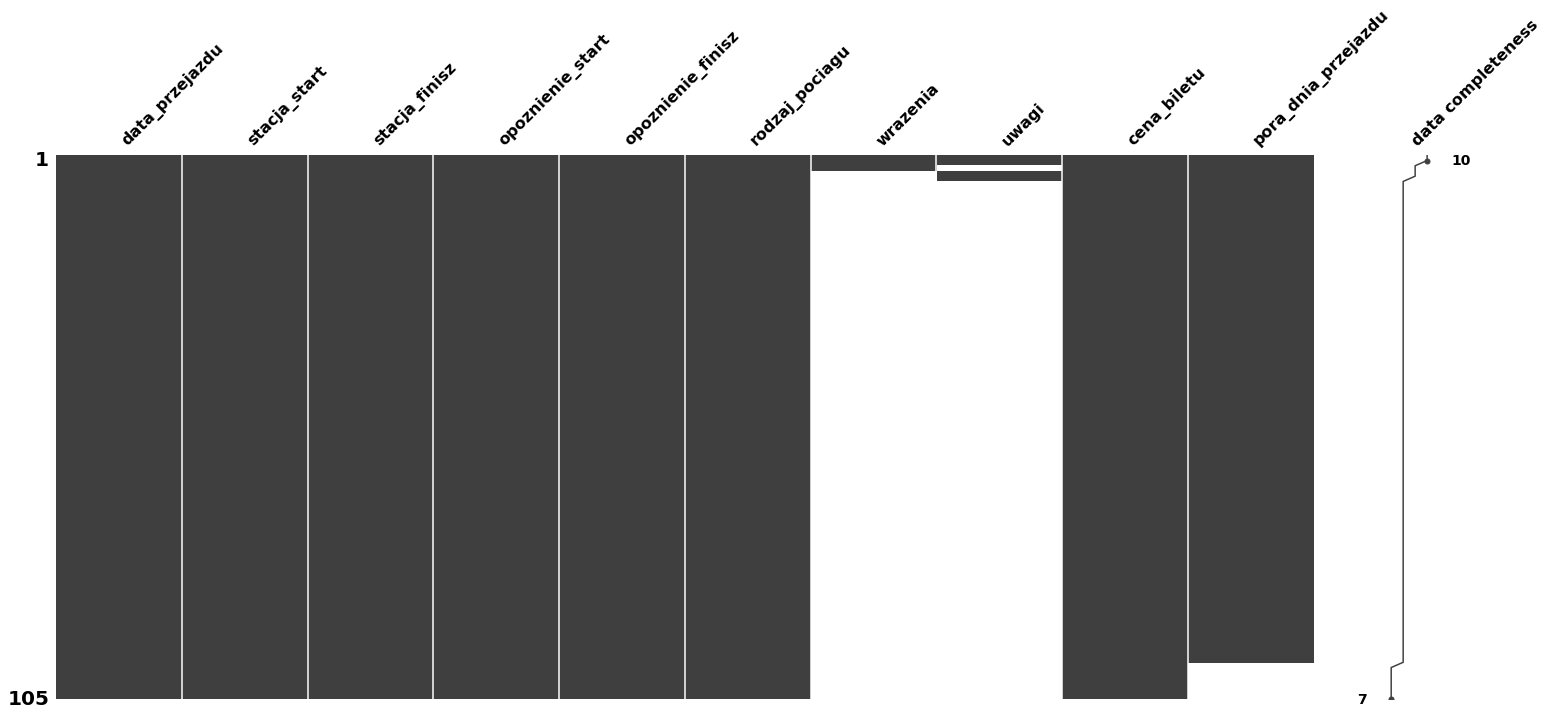

In [10]:
# Zadanie 2
msno.matrix(df, labels=True, sort="descending")

In [11]:
# Zadanie 3
condition = df.wrazenia.isnull() & df.uwagi.isnull()
df[~condition]

,data_przejazdu,stacja_start,stacja_finisz,opoznienie_start,opoznienie_finisz,rodzaj_pociagu,wrazenia,uwagi,cena_biletu,pora_dnia_przejazdu
20,2023-01-05,Warszawa Centralna,Gdańsk Oliwa,0,34,"""Zwykły"" InterCity",3.0,Pierwszy przejazd w Nowym Roku!,71.0000,popołudnie
50,2024-01-25,Gdańsk Oliwa,Legionowo,0,16,Pendolino,<NA>,Podstawili standardowy skład,169.0000,popołudnie
53,2023-02-07,Gdańsk Oliwa,Legionowo,0,50,"""Zwykły"" InterCity",<NA>,Awaria sterowania ruchem na Warszawa Praga,71.0000,popołudnie
78,2023-01-11,Legionowo Przystanek,Warszawa Centralna,0,3,Podmiejski / Regionalne,3.0,<NA>,15.0000,rano
86,2023-01-10,Gdańsk Oliwa,Legionowo,0,10,"""Zwykły"" InterCity",4.0,Pierwsza klasa wyjątkowo ;),71.0000,popołudnie


**Zadanie 4** - wiele braków w kolumnach (domyślnie usunięcie)<br>
Decyzja: kolumnę 'wrazenia' można usunąć; kolumnę 'uwagi' również, ale jednocześnie warto wyczyścić wiersz 50 usuwając go

In [12]:
# Zadanie 3 cd.
condition = df.pora_dnia_przejazdu.isnull()
df[condition]

,data_przejazdu,stacja_start,stacja_finisz,opoznienie_start,opoznienie_finisz,rodzaj_pociagu,wrazenia,uwagi,cena_biletu,pora_dnia_przejazdu
4,2023-03-27,Legionowo Przystanek,Warszawa Młynów,2,5,Podmiejski / Regionalne,<NA>,<NA>,15.0000,NaN
12,2023-04-05,Legionowo Pprzystanek,Warszawa Młynów,3,6,Podmiejski / Regionalne,<NA>,<NA>,15.0000,NaN
30,2023-06-01,Warszawa Gdańska,Katowice,4,20,"""Zwykły"" InterCity",<NA>,<NA>,71.0000,NaN
35,2023-07-07,Warszawa Centralna,Gdask Oliwa,45,52,Tanie Linie Kolejowe,<NA>,<NA>,71.0000,NaN
41,2023-01-12,Warszawa Gdańska,Legionowo Przystanek,3,3,Podmiejski / Regionalne,<NA>,<NA>,15.0000,NaN
60,2024-05-09,Warszawa Centralna,Gdask Oliwa,0,-1,Pendolino,<NA>,<NA>,169.0000,NaN
93,2023-01-11,Warszawa Toruńska,Legionowo Przystanek,0,0,Podmiejski / Regionalne,<NA>,<NA>,15.0000,NaN


**Zadanie 4 cd.** - mało braków w kolumnach (domyślnie substytucja)<br>
Niektóre braki można podpisać potencjalną wartością:<br> 
Jeśli start w Legionowie i koniec w Warszawie -> rano <br>
Jeśli start w Warszawie i koniec w Legionowie -> popołudnie <br>
Jeśli start w Warszawie i koniec w Gdańsku -> popołudnie <br>
Jeden brakujący wiersz (Warszawa-Katowice, index 30) można usunąć albo zastąpić dominantą <br>
Przy okazji uwaga do czyszczenia - widać, że są literówki w nazwach

<AxesSubplot:title={'center':'Braki danych w zbiorze'}, ylabel='Odsetek braków per kolumna'>

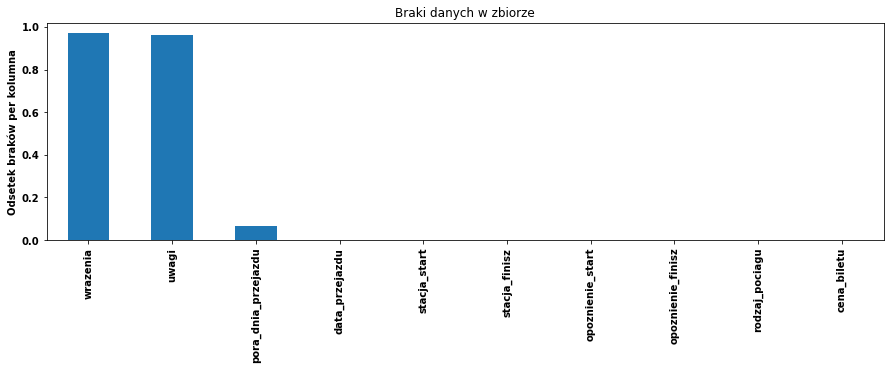

In [13]:
# Zadanie 5
df.isna().mean().sort_values(ascending=False).plot(
    kind="bar", figsize=(15, 4),
    title="Braki danych w zbiorze",
    ylabel="Odsetek braków per kolumna")

# <a id='duplikaty'>Duplikaty danych</a> 
1. Sprawdź liczbę duplikatów w danych
2. Wykorzystaj metodę duplicated do sporządzenia dataframe składającego się ze wszystkich dat, kiedy miał miejsce tylko jeden przejazd; posortuj ją rosnąco; wyświetl pierwsze 10 wierszy

In [14]:
# Zadanie 1
df.duplicated().sum()

0

In [15]:
# Zadanie 2
condition = df.duplicated(subset='data_przejazdu', keep=False)
df.loc[~condition, ['data_przejazdu']].sort_values(by='data_przejazdu').reset_index(drop=True).head(10)

,data_przejazdu
0,2023-01-05
1,2023-01-10
2,2023-01-17
3,2023-01-20
4,2023-01-22
5,2023-01-23
6,2023-01-25
7,2023-01-31
8,2023-02-01
9,2023-02-02


# <a id='czyszczenie'>Wstępne czyszczenie</a> 
1. Zastosuj przekształcenia czyszczące braki/duplikaty, które wymyśliłeś w poprzednich krokach (każdy)
    1. Dołącz przekształcenia do ciągu method chaining (opcjonalne)

In [16]:
# Zadanie 1
df = df.drop(columns=['wrazenia', 'uwagi'])
df = df.drop(index=[30, 50])


conditions = [
    (df.pora_dnia_przejazdu.isnull() & df.stacja_start.str.contains('Legionowo')).astype(bool),
    (df.pora_dnia_przejazdu.isnull() & df.stacja_finisz.str.contains('Legionowo')).astype(bool),
    (df.pora_dnia_przejazdu.isnull() & df.stacja_finisz.str.contains('Gdask')).astype(bool)
]
choices = [
    'rano',
    'popołudnie',
    'popołudnie'
]
df['pora_dnia_przejazdu'] = np.select(
    conditions,
    choices,
    df['pora_dnia_przejazdu']
)
df = df.reset_index(drop=True)
df

,data_przejazdu,stacja_start,stacja_finisz,opoznienie_start,opoznienie_finisz,rodzaj_pociagu,cena_biletu,pora_dnia_przejazdu
0,2023-03-07,Gdańsk Oliwa,Legionowo,0,16,"""Zwykły"" InterCity",71.0000,popołudnie
1,2023-02-02,Legionowo Przystanek,Warszawa Centralna,0,2,Podmiejski / Regionalne,15.0000,rano
2,2024-03-01,Warszawa Centralna,Gdańsk Oliwa,0,2,EIC,139.0000,popołudnie
3,2023-09-19,Gdańsk Oliwa,Warszawa Centralna,0,6,Tanie Linie Kolejowe,71.0000,rano
4,2023-03-27,Legionowo Przystanek,Warszawa Młynów,2,5,Podmiejski / Regionalne,15.0000,rano
...,...,...,...,...,...,...,...,...
98,2023-02-15,Warszawa Centralna,Gdańsk Oliwa,0,17,Pendolino,169.0000,popołudnie
99,2023-04-10,Gdańsk Oliwa,Legionowo,6,23,"""Zwykły"" InterCity",71.0000,popołudnie
100,2024-05-21,Gdańsk Oliwa,Warszawa Centralna,26,38,Pendolino,169.0000,rano
101,2023-12-01,Warszawa Centralna,Gdańsk Oliwa,1,136,"""Zwykły"" InterCity",71.0000,popołudnie


In [17]:
# zadanie 1A
filepath = r"C:\Users\pnaumczyk\Documents\Dane\Python_modelowanie_crashCourse\train.csv"
df = (
    pd.read_csv(filepath, sep=';')
    
    .assign(
        **{
             k: lambda df_, col = k: pd.to_datetime(df_[col])
                for k in [
                    'Kiedy jechał*ś?'
                ]
        },
        **{ k: lambda df_, col = k: pd.to_numeric(df_[col], downcast='float')
                for k in [
                    'Koszt podróży:'
                ]
        },
        **{ k: lambda df_, col = k: pd.to_numeric(df_[col], downcast='integer')
                for k in [
                    'Liczba minut opóźnienia na starcie:', 'Liczba minut opóźnienia na mecie:'
                ]
        }
    )
    
    .astype({
        **{ k: 'string' 
               for k in [
                   'Stacja początkowa:', 'Stacja końcowa:', 'Jak wrażenia z podróży? :D (nieobowiązkowe)', 'Uwagi (nieobowiązkowe):'
               ]            
        },
        **{ k: 'category' 
               for k in [
                   'Rodzaj pociągu:', 'Pora dnia:'
               ]            
        }
    })
    
    .rename(columns={
        'Kiedy jechał*ś?'         : 'data_przejazdu',
        'Stacja początkowa:'      : 'stacja_start',
        'Stacja końcowa:'         : 'stacja_finisz',
        'Rodzaj pociągu:'         : 'rodzaj_pociagu',
        'Uwagi (nieobowiązkowe):' : 'uwagi',
        'Koszt podróży:'          : 'cena_biletu',
        'Pora dnia:'              : 'pora_dnia_przejazdu',
        'Liczba minut opóźnienia na starcie:' : 'opoznienie_start',
        'Liczba minut opóźnienia na mecie:'   : 'opoznienie_finisz',
        'Jak wrażenia z podróży? :D (nieobowiązkowe)' : 'wrazenia'
    })
    
    .drop(columns=['wrazenia', 'uwagi'])
    .drop(index=[30, 50])
    
    .assign(
        pora_dnia_przejazdu = lambda df_: np.select(
        [
            (df_.pora_dnia_przejazdu.isnull() & df_.stacja_start.str.contains('Legionowo')).astype(bool),
            (df_.pora_dnia_przejazdu.isnull() & df_.stacja_finisz.str.contains('Legionowo')).astype(bool),
            (df_.pora_dnia_przejazdu.isnull() & df_.stacja_finisz.str.contains('Gdask')).astype(bool)
        ],
        [
            'rano',
            'popołudnie',
            'popołudnie'            
        ],
        df_.pora_dnia_przejazdu
    ))
    
    .reset_index(drop=True)
)
df

,data_przejazdu,stacja_start,stacja_finisz,opoznienie_start,opoznienie_finisz,rodzaj_pociagu,cena_biletu,pora_dnia_przejazdu
0,2023-03-07,Gdańsk Oliwa,Legionowo,0,16,"""Zwykły"" InterCity",71.0000,popołudnie
1,2023-02-02,Legionowo Przystanek,Warszawa Centralna,0,2,Podmiejski / Regionalne,15.0000,rano
2,2024-03-01,Warszawa Centralna,Gdańsk Oliwa,0,2,EIC,139.0000,popołudnie
3,2023-09-19,Gdańsk Oliwa,Warszawa Centralna,0,6,Tanie Linie Kolejowe,71.0000,rano
4,2023-03-27,Legionowo Przystanek,Warszawa Młynów,2,5,Podmiejski / Regionalne,15.0000,rano
...,...,...,...,...,...,...,...,...
98,2023-02-15,Warszawa Centralna,Gdańsk Oliwa,0,17,Pendolino,169.0000,popołudnie
99,2023-04-10,Gdańsk Oliwa,Legionowo,6,23,"""Zwykły"" InterCity",71.0000,popołudnie
100,2024-05-21,Gdańsk Oliwa,Warszawa Centralna,26,38,Pendolino,169.0000,rano
101,2023-12-01,Warszawa Centralna,Gdańsk Oliwa,1,136,"""Zwykły"" InterCity",71.0000,popołudnie


# <a id='zmienne'>Wyliczenie zmiennych wyjaśnianych</a> 
PZU postanawia ubezpieczyć szkody moralne wyniające z użytkowania PKP. Jeśli opóźnienie przekroczy 10 minut (opóźnienie > 10min), PZU wypłaci 50% ceny biletu. Jeśli przekroczy 30 minut (opóźnienie > 30min), zwróci pełny koszt biletu.
1. Stwórz zmienną określającą wystąpienie szkody 
2. Stwórz zmienną określającą wielkość szkody
3. Rozszerz ciąg method chaining o wyliczone zmienne (opcjonalne)

In [18]:
# Zadanie 1
df['czy_szkoda'] = np.where(
    df.opoznienie_finisz > 10,
    1,
    0
)
df

,data_przejazdu,stacja_start,stacja_finisz,opoznienie_start,opoznienie_finisz,rodzaj_pociagu,cena_biletu,pora_dnia_przejazdu,czy_szkoda
0,2023-03-07,Gdańsk Oliwa,Legionowo,0,16,"""Zwykły"" InterCity",71.0000,popołudnie,1
1,2023-02-02,Legionowo Przystanek,Warszawa Centralna,0,2,Podmiejski / Regionalne,15.0000,rano,0
2,2024-03-01,Warszawa Centralna,Gdańsk Oliwa,0,2,EIC,139.0000,popołudnie,0
3,2023-09-19,Gdańsk Oliwa,Warszawa Centralna,0,6,Tanie Linie Kolejowe,71.0000,rano,0
4,2023-03-27,Legionowo Przystanek,Warszawa Młynów,2,5,Podmiejski / Regionalne,15.0000,rano,0
...,...,...,...,...,...,...,...,...,...
98,2023-02-15,Warszawa Centralna,Gdańsk Oliwa,0,17,Pendolino,169.0000,popołudnie,1
99,2023-04-10,Gdańsk Oliwa,Legionowo,6,23,"""Zwykły"" InterCity",71.0000,popołudnie,1
100,2024-05-21,Gdańsk Oliwa,Warszawa Centralna,26,38,Pendolino,169.0000,rano,1
101,2023-12-01,Warszawa Centralna,Gdańsk Oliwa,1,136,"""Zwykły"" InterCity",71.0000,popołudnie,1


In [19]:
# Zadanie 2
conditions = [
    df.opoznienie_finisz.gt(10) & df.opoznienie_finisz.le(30),
    df.opoznienie_finisz.gt(30)
]
choices = [
    df.cena_biletu * 0.5,
    df.cena_biletu
]
df['wyplata_szkoda'] = np.select(conditions, choices, 0.0)
df

,data_przejazdu,stacja_start,stacja_finisz,opoznienie_start,opoznienie_finisz,rodzaj_pociagu,cena_biletu,pora_dnia_przejazdu,czy_szkoda,wyplata_szkoda
0,2023-03-07,Gdańsk Oliwa,Legionowo,0,16,"""Zwykły"" InterCity",71.0000,popołudnie,1,35.5000
1,2023-02-02,Legionowo Przystanek,Warszawa Centralna,0,2,Podmiejski / Regionalne,15.0000,rano,0,0.0000
2,2024-03-01,Warszawa Centralna,Gdańsk Oliwa,0,2,EIC,139.0000,popołudnie,0,0.0000
3,2023-09-19,Gdańsk Oliwa,Warszawa Centralna,0,6,Tanie Linie Kolejowe,71.0000,rano,0,0.0000
4,2023-03-27,Legionowo Przystanek,Warszawa Młynów,2,5,Podmiejski / Regionalne,15.0000,rano,0,0.0000
...,...,...,...,...,...,...,...,...,...,...
98,2023-02-15,Warszawa Centralna,Gdańsk Oliwa,0,17,Pendolino,169.0000,popołudnie,1,84.5000
99,2023-04-10,Gdańsk Oliwa,Legionowo,6,23,"""Zwykły"" InterCity",71.0000,popołudnie,1,35.5000
100,2024-05-21,Gdańsk Oliwa,Warszawa Centralna,26,38,Pendolino,169.0000,rano,1,169.0000
101,2023-12-01,Warszawa Centralna,Gdańsk Oliwa,1,136,"""Zwykły"" InterCity",71.0000,popołudnie,1,71.0000


In [20]:
# Zadanie 3
filepath = r"C:\Users\pnaumczyk\Documents\Dane\Python_modelowanie_crashCourse\train.csv"
df = (
    pd.read_csv(filepath, sep=';')
    
    .assign(
        **{
             k: lambda df_, col = k: pd.to_datetime(df_[col])
                for k in [
                    'Kiedy jechał*ś?'
                ]
        },
        **{ k: lambda df_, col = k: pd.to_numeric(df_[col], downcast='float')
                for k in [
                    'Koszt podróży:'
                ]
        },
        **{ k: lambda df_, col = k: pd.to_numeric(df_[col], downcast='integer')
                for k in [
                    'Liczba minut opóźnienia na starcie:', 'Liczba minut opóźnienia na mecie:'
                ]
        }
    )
    
    .astype({
        **{ k: 'string' 
               for k in [
                   'Stacja początkowa:', 'Stacja końcowa:', 'Jak wrażenia z podróży? :D (nieobowiązkowe)', 'Uwagi (nieobowiązkowe):'
               ]            
        },
        **{ k: 'category' 
               for k in [
                   'Rodzaj pociągu:', 'Pora dnia:'
               ]            
        }
    })
    
    .rename(columns={
        'Kiedy jechał*ś?'         : 'data_przejazdu',
        'Stacja początkowa:'      : 'stacja_start',
        'Stacja końcowa:'         : 'stacja_finisz',
        'Rodzaj pociągu:'         : 'rodzaj_pociagu',
        'Uwagi (nieobowiązkowe):' : 'uwagi',
        'Koszt podróży:'          : 'cena_biletu',
        'Pora dnia:'              : 'pora_dnia_przejazdu',
        'Liczba minut opóźnienia na starcie:' : 'opoznienie_start',
        'Liczba minut opóźnienia na mecie:'   : 'opoznienie_finisz',
        'Jak wrażenia z podróży? :D (nieobowiązkowe)' : 'wrazenia'
    })
    
    .drop(columns=['wrazenia', 'uwagi'])
    .drop(index=[30, 50])
    
    .assign(
        pora_dnia_przejazdu = lambda df_: np.select(
        [
            (df_.pora_dnia_przejazdu.isnull() & df_.stacja_start.str.contains('Legionowo')).astype(bool),
            (df_.pora_dnia_przejazdu.isnull() & df_.stacja_finisz.str.contains('Legionowo')).astype(bool),
            (df_.pora_dnia_przejazdu.isnull() & df_.stacja_finisz.str.contains('Gdask')).astype(bool)
        ],
        [
            'rano',
            'popołudnie',
            'popołudnie'            
        ],
        df_.pora_dnia_przejazdu
    ))
    
    .reset_index(drop=True)
    
    .assign(
        czy_szkoda = lambda df_: np.where(
            df_.opoznienie_finisz > 10,
            1,
            0
        ),
        
        wyplata_szkoda = lambda df_: np.select(
            [
                df_.opoznienie_finisz.gt(10) & df_.opoznienie_finisz.le(30),
                df_.opoznienie_finisz.gt(30)
            ],
            [
                df_.cena_biletu * 0.5,
                df_.cena_biletu
            ],
            0.0
        )
    )
)
df

,data_przejazdu,stacja_start,stacja_finisz,opoznienie_start,opoznienie_finisz,rodzaj_pociagu,cena_biletu,pora_dnia_przejazdu,czy_szkoda,wyplata_szkoda
0,2023-03-07,Gdańsk Oliwa,Legionowo,0,16,"""Zwykły"" InterCity",71.0000,popołudnie,1,35.5000
1,2023-02-02,Legionowo Przystanek,Warszawa Centralna,0,2,Podmiejski / Regionalne,15.0000,rano,0,0.0000
2,2024-03-01,Warszawa Centralna,Gdańsk Oliwa,0,2,EIC,139.0000,popołudnie,0,0.0000
3,2023-09-19,Gdańsk Oliwa,Warszawa Centralna,0,6,Tanie Linie Kolejowe,71.0000,rano,0,0.0000
4,2023-03-27,Legionowo Przystanek,Warszawa Młynów,2,5,Podmiejski / Regionalne,15.0000,rano,0,0.0000
...,...,...,...,...,...,...,...,...,...,...
98,2023-02-15,Warszawa Centralna,Gdańsk Oliwa,0,17,Pendolino,169.0000,popołudnie,1,84.5000
99,2023-04-10,Gdańsk Oliwa,Legionowo,6,23,"""Zwykły"" InterCity",71.0000,popołudnie,1,35.5000
100,2024-05-21,Gdańsk Oliwa,Warszawa Centralna,26,38,Pendolino,169.0000,rano,1,169.0000
101,2023-12-01,Warszawa Centralna,Gdańsk Oliwa,1,136,"""Zwykły"" InterCity",71.0000,popołudnie,1,71.0000


# <a id='opisowe'>Statystyki opisowe</a> 
1. Wyświetl statystyki opisowe zmiennych ciągłych obejmujące percentyle: 33% 50% 66% 90%
2. Wyświetl statystyki opisowe zmiennych kategorialnych
3. Dla zmiennych kategorialnych wyświetl liczebności poszczególnych kategorii
4. Wyświetl wykres zawierający liczbę unikalnych kategorii dla każdej ze zmiennych ciągłych (opcjonalne)

In [21]:
# Zadanie 1
perc_list=[.33, .5, .66, .9]
df.describe(percentiles=perc_list).T

,count,mean,std,min,33%,50%,66%,90%,max
opoznienie_start,103.0000,2.9612,7.5302,0.0000,0.0000,0.0000,0.0000,8.8000,45.0000
opoznienie_finisz,103.0000,14.3010,20.9345,-1.0000,2.6600,6.0000,12.0000,38.0000,136.0000
cena_biletu,103.0000,87.2913,50.9159,15.0000,71.0000,71.0000,71.0000,169.0000,169.0000
czy_szkoda,103.0000,0.3689,0.4849,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000
wyplata_szkoda,103.0000,21.5388,34.5807,0.0000,0.0000,0.0000,35.5000,71.0000,169.0000


In [22]:
# Zadanie 2
df.describe(exclude='number', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max
data_przejazdu,103,NaN,NaN,NaN,2023-08-20 05:35:32.038834944,2023-01-05,2023-03-11,2023-08-24,2024-01-14,2024-05-27
stacja_start,103,9,Warszawa Centralna,44,NaT,NaT,NaT,NaT,NaT,NaT
stacja_finisz,103,8,Gdańsk Oliwa,42,NaT,NaT,NaT,NaT,NaT,NaT
rodzaj_pociagu,103,5,"""Zwykły"" InterCity",48,NaT,NaT,NaT,NaT,NaT,NaT
pora_dnia_przejazdu,103,2,popołudnie,64,NaT,NaT,NaT,NaT,NaT,NaT


In [23]:
# Zadanie 3
col_list = df.select_dtypes(exclude=['number', 'datetime']).columns
for col in col_list:
    display(df[col].value_counts().to_frame())

,stacja_start
Warszawa Centralna,44
Gdańsk Oliwa,39
Legionowo Przystanek,12
Legionowo,2
Gdańsk Główny,2
Legionowo Pprzystanek,1
Warszawa Gdańska,1
Gdask Oliwa,1
Warszawa Toruńska,1


,stacja_finisz
Gdańsk Oliwa,42
Warszawa Centralna,37
Legionowo,15
Warszawa Młynów,2
Gdask Oliwa,2
Legionowo Przystanek,2
Gdańsk Oliwa,2
Warszawa Gdańska,1


,rodzaj_pociagu
"""Zwykły"" InterCity",48
Pendolino,25
Podmiejski / Regionalne,15
Tanie Linie Kolejowe,14
EIC,1


,pora_dnia_przejazdu
popołudnie,64
rano,39


<AxesSubplot:title={'center':'Liczba unikalnych kategorii w zmiennej'}>

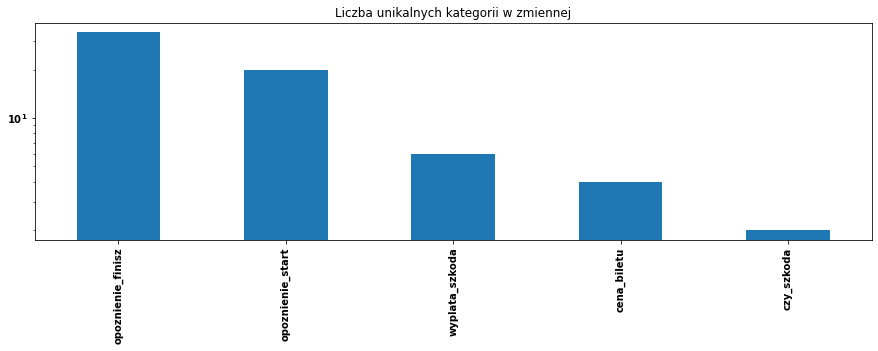

In [24]:
# Zadanie 5
unique_values = df.select_dtypes(include="number").nunique().sort_values(ascending=False)
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Liczba unikalnych kategorii w zmiennej")

# <a id='wykresy'>Wykresy podstawowe w pandas</a> 
1. Wyświetl wykresy rozrzutu zmiennych ciągłych (każdy)
    1. Posortuj dane według daty i wykreśl wykresy rozrzutu ponownie (opcjonalne)
2. Wyświetl histogramy rozkładu zmiennych ciągłych
3. Wyświetl wartości opóżnienń (na starcie i mecie) oraz wielkości wypłaty w zależności od dnia podróży (na jednym wykresie, posortowne datami)
4. Wyświetl wykresy pudełkowe pokazujące różnice w wypłaconym odszkodowaniu dla miast startu: Warszawa, Gdańsk, inne (każde miasto osobny wykres) oraz dla każdego typu pociągu (podział wewnątrz wykresu)
5. Wyświetl wykres punktowy pokazujący zależność między opóźnieniem na starcie, a opóźnieniem na mecie z poszczególnymi rodzajami pociągu zaznaczonymi odmiennymi kolorami z palety "viridis"

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

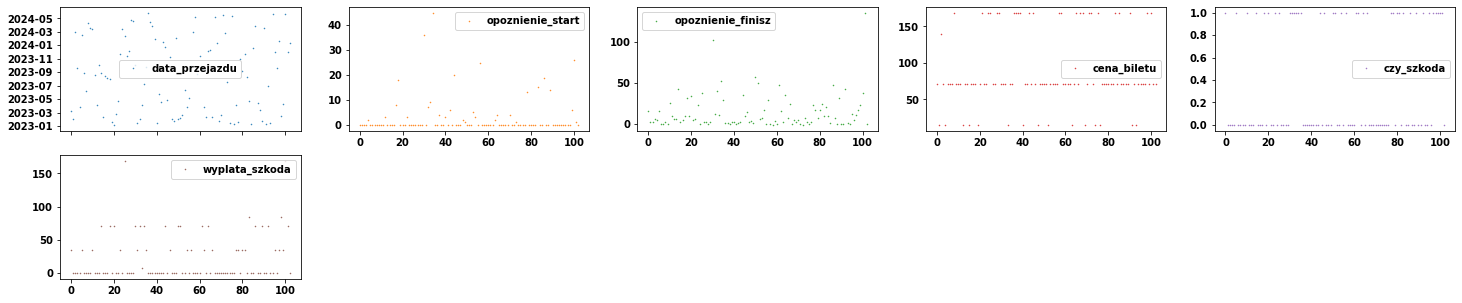

In [25]:
# Zadanie 1
n_columns = 5
n_rows = np.ceil(df.select_dtypes(include='number').shape[1] / n_columns)

df.plot(lw=0, marker=".", subplots=True, layout=(-1, n_columns),
          figsize=(n_columns*5, n_rows*5), markersize=1)

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

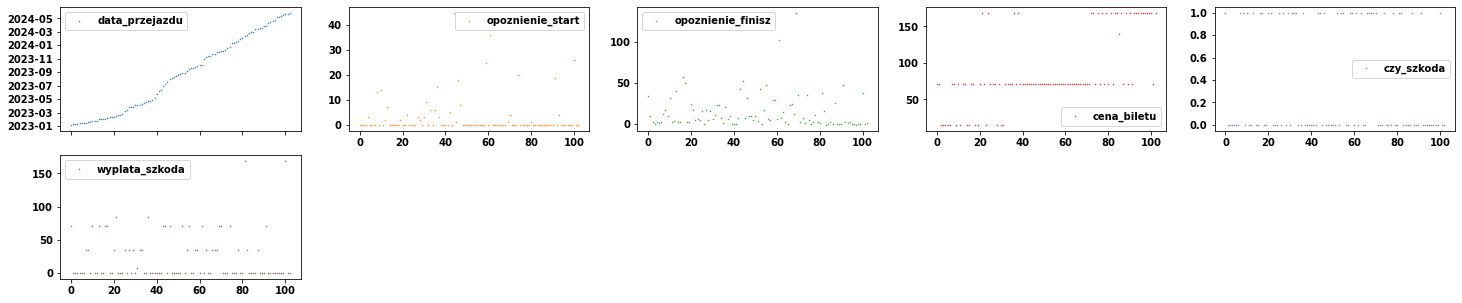

In [26]:
# Zadanie 1A
n_columns = 5
n_rows = np.ceil(df.select_dtypes(include='number').shape[1] / n_columns)

df.sort_values(by='data_przejazdu').reset_index(drop=True).plot(lw=0, marker=".", subplots=True, layout=(-1, n_columns),
          figsize=(n_columns*5, n_rows*5), markersize=1)

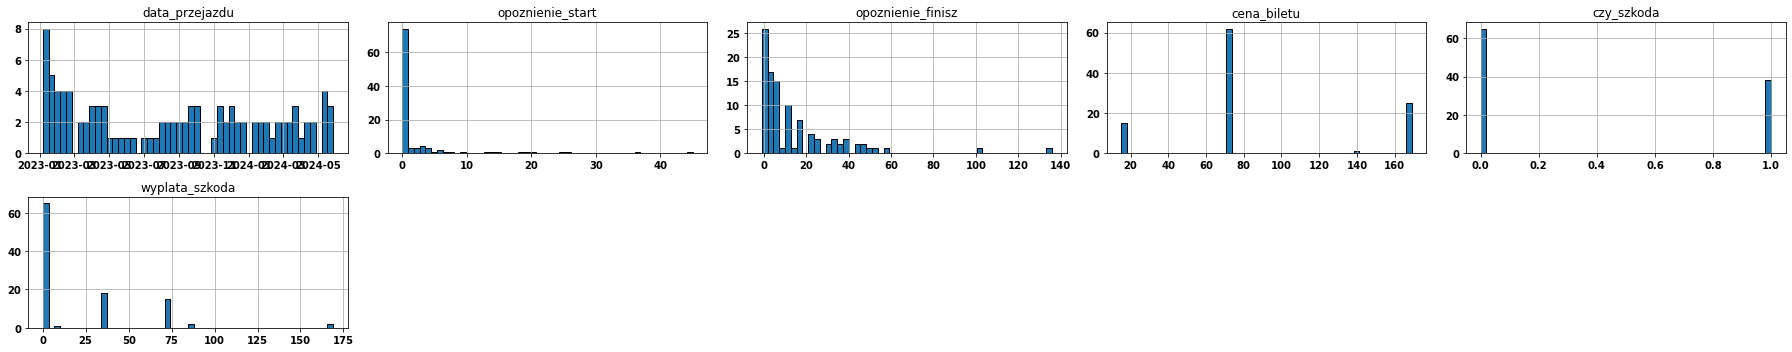

In [27]:
# Zadanie 2
n_columns = 5
n_rows = np.ceil(df.select_dtypes(include='number').shape[1] / n_columns)
n_bins = 50

df.hist(bins=n_bins, figsize=(n_columns*5, n_rows*5), layout=(-1, n_columns), edgecolor="black")
plt.tight_layout()

<AxesSubplot:xlabel='data_przejazdu'>

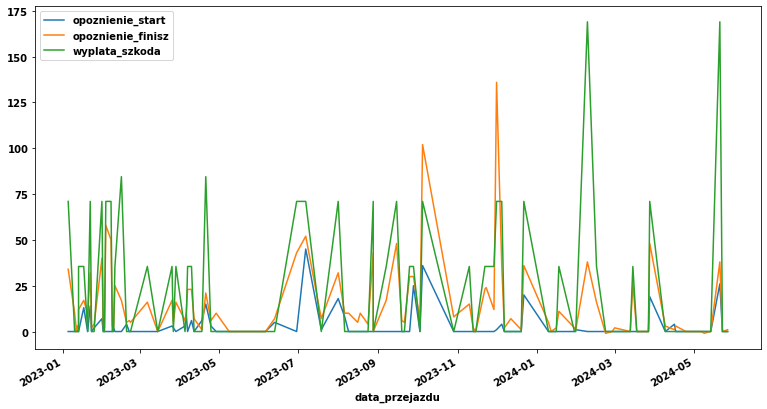

In [28]:
# Zadanie 3
cols=['data_przejazdu', 'opoznienie_start', 'opoznienie_finisz', 'wyplata_szkoda']
df_vis = (
    df[cols]
    .set_index('data_przejazdu')
    .sort_index()
)
df_vis.plot(figsize=(13,7))

Gdańsk           AxesSubplot(0.1,0.559091;0.363636x0.340909)
Warszawa    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
inne                 AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

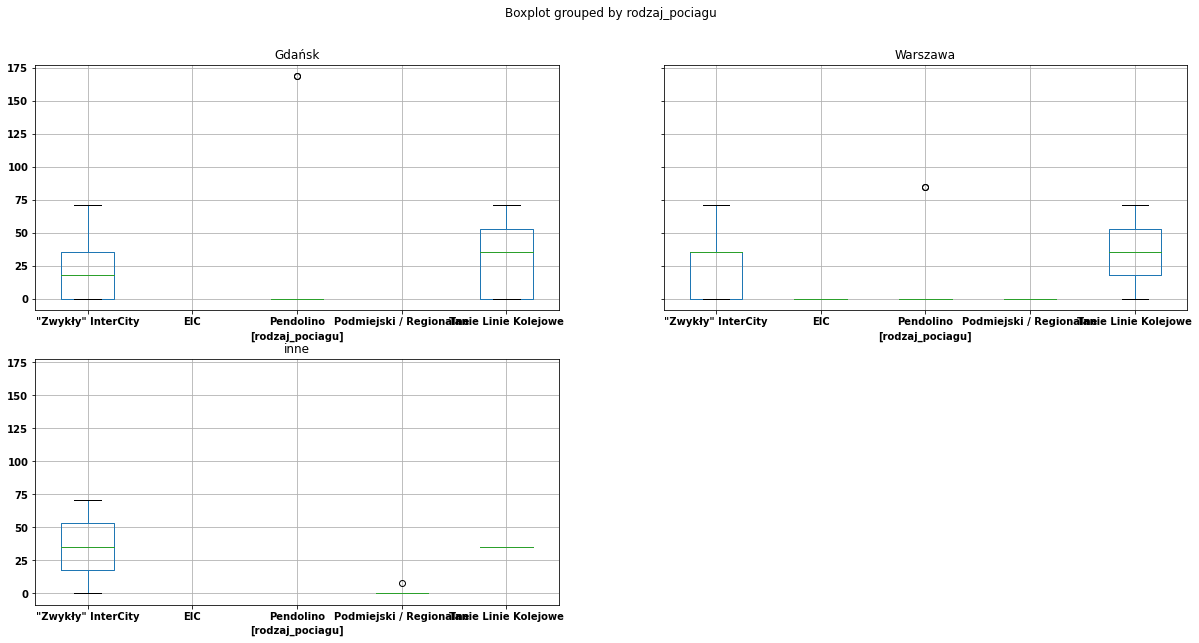

In [29]:
# Zadanie 4
cols = ['wyplata_szkoda', 'stacja_start', 'rodzaj_pociagu']
df_vis = (
    df[cols]
    .assign(
        stacja_start = lambda df_: np.select(
            [
                df_.stacja_start.str.contains("Warszawa").astype(bool),
                df_.stacja_start.str.contains("Gdańsk").astype(bool)
            ],
            [
                "Warszawa",
                "Gdańsk"
            ],
            "inne"
        )
    )
)
df_vis.groupby(by='stacja_start').boxplot(by='rodzaj_pociagu', figsize=(20,10))

<AxesSubplot:xlabel='opoznienie_start', ylabel='opoznienie_finisz'>

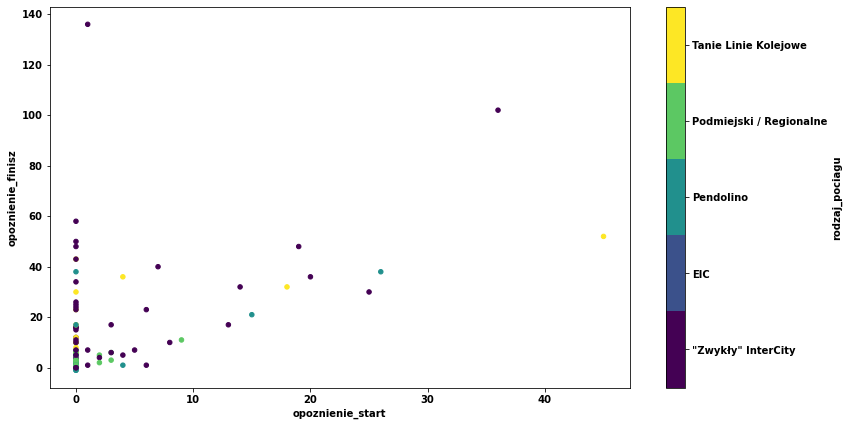

In [30]:
# Zadanie 5
cols = ['opoznienie_start', 'opoznienie_finisz', 'rodzaj_pociagu']
df_vis = df[cols]
df_vis.plot.scatter(x='opoznienie_start', y='opoznienie_finisz', c='rodzaj_pociagu', cmap='viridis', figsize=(13,7), sharex=False)